## Description about this notebook
This notebook is designed to visually compare the performance of our three different YOLO NAS models (Small, Medium, Large) in terms of two key metrics: Mean Average Precision at 50% (MAP50) and Mean Average Precision from 50% to 95% (MAP50:95). We employed a supervision function for this evaluation. The assessment was carried out on a test dataset, which was not previously exposed to the models. This test dataset We used is unseen by the model and we use out old dataset (holistain cow with one side camera angle). 

In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *
import pandas as pd
import matplotlib.pyplot as plt

The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-12-07 15:11:07] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-07 15:11:08] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-07 15:11:08] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-12-07 15:11:18] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-07 15:11:18] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-07 15:11:18] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-07 15:11:18] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### class inits and other inputs

path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test_old"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_m = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-12-07 15:11:18] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-07 15:11:19] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [4]:
# Initialize a list to store models
models_m = []

# Loop over each path and load the model
for path in finetuned_model_path_m:
    model_m = my_nas.load(path_model,path)  # Load the model using the current path
    models_m.append(model_m)




[2023-12-07 15:11:20] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 15:11:21] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 15:11:23] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 15:11:24] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 15:11:25] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth EMA checkpoint.


In [5]:
evaluation_results_m = []

for model in models_m:
    metrics_m = my_nas.get_map_scores(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_m.append(metrics_m)

model yolo_nas_m loaded


/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
[2023-12-07 15:11:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:11:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:11

In [7]:
path_model = 'yolo_nas_l' 



finetuned_model_path_l = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth"]



In [8]:
models_l = []

# Loop over each path and load the model
for path in finetuned_model_path_l:
    model_l = my_nas.load(path_model,path)  
    models_l.append(model_l)

[2023-12-07 15:13:10] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 15:13:12] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 15:13:13] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 15:13:15] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 15:13:16] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth EMA checkpoint.


In [9]:
evaluation_results_l = []

for model in models_l:
    metrics_l = my_nas.get_map_scores(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_l.append(metrics_l)

[2023-12-07 15:13:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


model yolo_nas_l loaded


[2023-12-07 15:13:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:13:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:13:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:13:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:13:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:13:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:13:20] INFO -

In [12]:
###########for the small model ######################

In [13]:
path_model = 'yolo_nas_s' 



finetuned_model_path_s = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth"]


In [14]:
models_s = []

# Loop over each path and load the model
for path in finetuned_model_path_s:
    model_s = my_nas.load(path_model,path)  
    models_s.append(model_s)

[2023-12-07 15:15:29] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:15:30] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:15:30] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:15:31] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 15:15:32] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth EMA checkpoint.


In [15]:
evaluation_results_s = []

for model in models_s:
    metrics_s = my_nas.get_map_scores(model, data_yaml_path, "test")  
    evaluation_results_s.append(metrics_s)

[2023-12-07 15:15:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


model yolo_nas_s loaded


[2023-12-07 15:15:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:15:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:15:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:15:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:15:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:15:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-12-07 15:15:34] INFO -

## Discription about the Data
### Training Dataset:
All The finetuned models ( YoloNas L, YoploNas M and YoloNas S) are trained on our old dataset which was only Holstein Cows with just only one side angle of the camera. 
### Testing Dataset:
The test is done one the same old dataset. Only Holstein Cows with just only one side angle of the camera.( But the dataset for testing is unseen by the model)


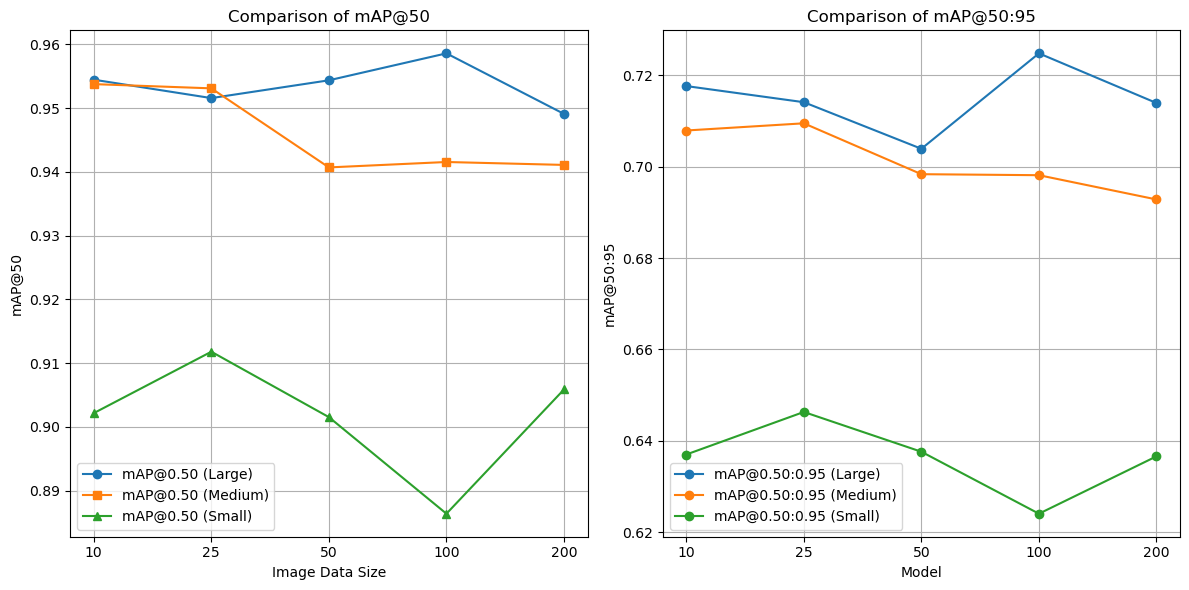

In [16]:

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['10', '25', '50', '100', '200']

# Plotting
plt.figure(figsize=(12, 6))

# mAP@0.50 Plot
plt.subplot(1, 2, 1)
plt.plot(df_l['mAP@50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@50'], '-^', label='mAP@0.50 (Small)')
plt.title('Comparison of mAP@50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@50')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

# mAP@0.50:0.95 Plot
plt.subplot(1, 2, 2)
plt.plot(df_l['mAP@50:95'], '-o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@50:95'], '-o', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@50:95'], '-o', label='mAP@0.50:0.95 (Small)')
plt.title('Comparison of mAP@50:95')
plt.xlabel('Model')
plt.ylabel('mAP@50:95')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
